# Project: Sowing plan

**STMO**

2020-2021

Project by: Kirsten Van Huffel & Tristan Vanneste

## Outline

In this project, we will implement a sowing plan for a mixed culture of three types of crops. At our disposal, we have fifteen plots of land, to be planted using a limited supply of seeds. The different lots have varying soil compositions, influencing plant growth. Furthermore, some combinations of the crops grow well together; other combinations show competition. These aspects make for a challenging optimization problem!

In [1]:
n = 15

15

## A model for plant growth

We have $n=15$ plots of land. The three types of plants are denoted with x, y, and z, respectively. Indices are used to indicate the amount of seed distributed to a particular plot, e.g., $x_i$ is the amount of seed assigned to the $i$-th plot. So this optimization problem can be solved in a $15\times 3=45$-dimensional space.

Small-capped variables indicate the amount of seed assigned to a field. Large-cap variables represent the corresponding yield of that field, i.e., $X_i$ is the yield (in kg) for field $i$. The yield for each type of seed can be computed using the following equations:

$$X_i = \frac{A_i^x x_i^2}{120 + x_i^2 + 2y_i - 0.8x_iz_i + z_i^2}\,,$$

$$Y_i = \frac{A_i^y y_i^2}{30 + 4x_i + y_i^2 + 7z_i}\,,$$

$$Z_i = \frac{A_i^z z_i^2}{80 + 0.4x_i^2 + 0.2x_iz_i +0.6y_i + z_i^2}\,.$$

Here, $A_i^x$, $A_i^y$, $A_i^z$ represent the maximum in yields in field $i$ for the different seed types. It depends on the amount of nitrogen $u_i$ and the water status $v_i$ of the soil. The following equation can be used to compute these coefficients:

$$\begin{bmatrix}
A_i^x \\
A_i^y\\
A_i^z
\end{bmatrix}
=
\begin{bmatrix}
4 & 2  \\
1 & 0.3 \\
-0.5 & 4
\end{bmatrix}
\begin{bmatrix}
u_i \\
v_j\\
\end{bmatrix}
+
\begin{bmatrix}
100 \\
300 \\
210
\end{bmatrix}\,.$$

In [2]:
S, b = [4 2; 1 0.3; -0.5 4], [100, 300, 210]  # soil effects

([4.0 2.0; 1.0 0.3; -0.5 4.0], [100, 300, 210])

The growth model has several interesting facets:
- sowing more seed results in a larger yield, however, the effect saturates, increasing quantities have diminishing returns;
- the plants show competition;
- z positively influences x, while x negatively influences z (z produces nitrogen while x requires much nitrogen);
- y is a good producer but very sensitive to adverse conditions.

Below are the concentrations of nitrogen ($u$) and water status ($v$) for every field.

In [3]:
u = [36.6776, 36.9967, 83.033, 50.3725, 43.4616, 55.5842, 44.8919, 99.6519, 20.158, 102.325, 96.8896, 33.7957, 26.6129, 38.7194, 60.1461]

15-element Array{Float64,1}:
  36.6776
  36.9967
  83.033
  50.3725
  43.4616
  55.5842
  44.8919
  99.6519
  20.158
 102.325
  96.8896
  33.7957
  26.6129
  38.7194
  60.1461

In [4]:
v = [34.5773,  24.3003,  24.3952,  28.462,  37.2912,  38.196,  36.4821,  30.1988,  20.9124,  35.207,  38.0924,  24.438,  28.3169,  20.3022,  24.8884]

15-element Array{Float64,1}:
 34.5773
 24.3003
 24.3952
 28.462
 37.2912
 38.196
 36.4821
 30.1988
 20.9124
 35.207
 38.0924
 24.438
 28.3169
 20.3022
 24.8884

The total amount of seed for every type is fixed by $c_x$, $c_y$, $c_z$:

In [5]:
cx, cy, cz = 250, 175, 325

(250, 175, 325)

Finally, the yield for each crop can be sold at different prices (EUR/kg) $w_x$, $w_y$, $w_z$:

In [6]:
wx, wy, wz = 0.7, 0.85, 0.6

(0.7, 0.85, 0.6)

So the objective is

$$f(\mathbf{x}, \mathbf{y}, \mathbf{z}) = \sum_{i=1}^{15}w_xX_i(x_i,y_i,z_i) + w_yY_i(x_i,y_i,z_i)+w_zZ_i(x_i,y_i,z_i)\,,$$

but the constraints are

$$\sum_{i=1}^{15} x_i \le c_x \quad\text{and}\quad x_i\geq 0\text{ for }i=1,\ldots,15\,,$$

$$\sum_{i=1}^{15} y_i \le c_y \quad\text{and}\quad y_i\geq 0\text{ for }i=1,\ldots,15\,,$$

$$\sum_{i=1}^{15} z_i \le c_z \quad\text{and}\quad z_i\geq 0\text{ for }i=1,\ldots,15\,.$$

Note: the sum constraints are inequalities because you don't need to use all the seed. However, the optimal solution will likely use all the available seed.

## An example

Let us compute the yield for plot 1 when we sow $x_1=10,y_1=6, z_1=8$. First, we compute the maximum yields, then the resulting concrete yields and, finally the value.

In [7]:
x1, y1, z1 = 10, 6, 8  # amount of seed per plot

(Ax1, Ay1, Az1) = S * [u[1], v[1]] .+ b # maximum yield

X1 = (Ax1 * x1^2) / (120 + x1^2 + 2y1 - 0.8x1 * z1 + z1^2) # yield for X1

Y1 = (Ay1 * y1^2) / (30 + 4x1 + y1^2 + 7z1) # yield for Y1

Z1 = (Az1 * z1^2) / (80 + 0.4x1 + 0.2x1*z1 +0.6y1 + z1^2) # yield for Z1

revenue_plot1 = wx * X1 + wy * Y1 + wz * Z1 # the yiels * revenue 

236.45994296256367

# Assignments

1. Give the formal optimization problem. Also provide the Lagrangian formulation.
2. Is the optimization problem of the optimal sowing plan concave? (since it is a maximization problem, I mean is minimizing the negative total revenue of a plan convex). You don't have to prove this formally, but you can make visual arguments. For a given field, make a the contour plots for (x,y), (x,z) and (y,z), always setting the third variable to 0.
3. Give a good/optimal sowing plan. You may solve this either using custom code or using a Julia package [Optim.jl](https://github.com/JuliaNLSolvers/Optim.jl), [Convex.jl](https://github.com/jump-dev/Convex.jl), or [JuMP.jl](https://github.com/jump-dev/JuMP.jl). Make plots of your solution and discuss it.
4. Given an optimal sowing plan found in the previous assignment, what is the price per kg for every seed you would be willing to buy, as to be break-even? How would you use this additional marginal quantity of seed. (HINT: you can obtain this from the Lagrangian).
5. Provide three alternative solutions, each in which you only use one of the types of seed, e.g. $\max_\mathbf{x}f(\mathbf{x}, 0, 0)$. Show and discuss the difference.

## Submission

Hand in the solved Jupyter notebook by **14 November 2020**. Send your notebook to [me](michiel.stock@ugent.be) both as Pluto notebook file (.jl) and as **PDF or HTML file**. Hand in a CSV file with your best **valid** solution for question 3. In this file, every row is a plot of land and the three columns represent x, y, z, respectively.

## Questions yet to ask to Michiel

1) are the constrains linear? 


In [10]:
# loading packages 
using Plots
using LinearAlgebra
using STMO
import STMO.TestFuns: fquadr, grad_fquadr, hess_fquadr
import STMO.TestFuns: fnonquadr, grad_fnonquadr, hess_fnonquadr

### 1. Formal description of the problem

Langrangia formulation is of the form: 

$L(x,\nu) = f(x) +\nu g(x)$

Since the function 
$$f(\mathbf{x}, \mathbf{y}, \mathbf{z}) = \sum_{i=1}^{15}w_xX_i(x_i,y_i,z_i) + w_yY_i(x_i,y_i,z_i)+w_zZ_i(x_i,y_i,z_i)\,,$$ 
is for making profit we actually want this as large as possible. Putting a minus in front of the function will make sure the minimizer is actually the maximal profit. 

$$L(x,\nu) = -\sum_{i=1}^{15}w_xX_i(x_i,y_i,z_i) + w_yY_i(x_i,y_i,z_i)+w_zZ_i(x_i,y_i,z_i)\ +\nu * $$

$$\sum_{i=1}^{15} x_i \le c_x \quad\text{and}\quad x_i\geq 0\text{ for }i=1,\ldots,15\,,$$

$$\sum_{i=1}^{15} y_i \le c_y \quad\text{and}\quad y_i\geq 0\text{ for }i=1,\ldots,15\,,$$

$$\sum_{i=1}^{15} z_i \le c_z \quad\text{and}\quad z_i\geq 0\text{ for }i=1,\ldots,15\,.$$

In [8]:
### 2. Concavity Let's plot the contour plots for field 1
# total amount of seeds 
cx, cy, cz = 250, 175, 325
# the yields 
wx, wy, wz = 0.7, 0.85, 0.6
# total amount of yield for field 1
(Ax1, Ay1, Az1) = S * [u[1], v[1]] .+ b # maximum yield
# since we have only one field our total amount of seeds can be used here

1:10

In [7]:
function totalobjectivefunction(xvector,yvector,zvector)
    revenue_plot= fill(0.0, size(xvector, 1))
    for i in 1:size(xvector, 1) # this is going to be 15 for the 15 plots
        x = xvector[i]
        y = yvector[i]
        z = zvector[i]
        (Ax, Ay, Az) = S * [u[i], v[i]] .+ b
        X = (Ax * x^2) / (120 + x^2 + 2y - 0.8x * z + z^2)
        Y = (Ay * y^2) / (30 + 4x + y^2 + 7z)
        Z = (Az * z^2) / (80 + 0.4x + 0.2x*z +0.6y + z^2)
        revenue_plot[i] = wx * X + wy * Y + wz * Z
    end
    revenue = -sum(revenue_plot) # this minus is bcs we need to find the minimum with our methods and not the max
    return revenue
    
end

totalobjectivefunction (generic function with 1 method)

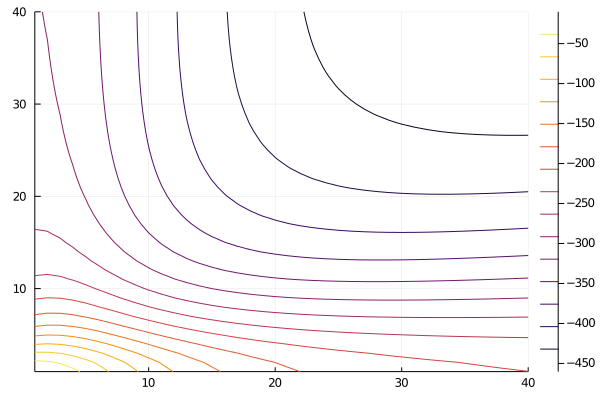

In [28]:
x = 1:40
y = 1:40
z = 1:40
contour(x,y,(x,y)->totalobjectivefunction(x,y,0)) # blijkbaar neemt de contour plot 1 random value uit x en y om dit te plotten en zo heel de tijd opnieuw en opnieuw. 

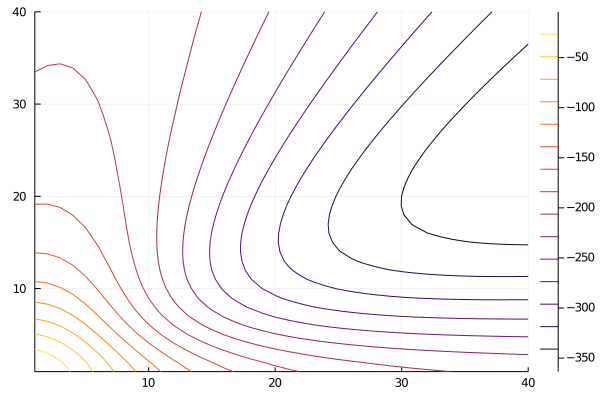

In [27]:
x = 1:40
y = 1:40
z = 1:40
contour(x,z,(x,z)->totalobjectivefunction(x,0,z))

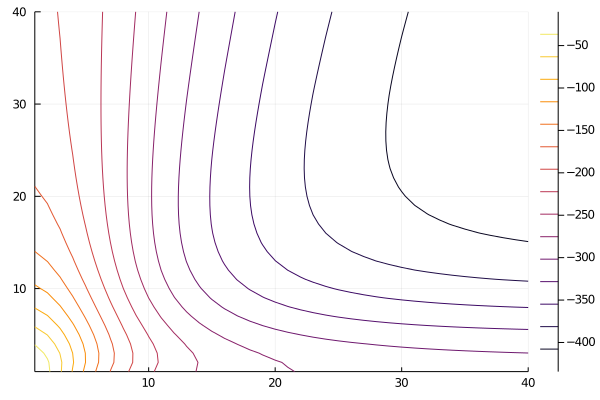

In [29]:
x = 1:40
y = 1:40
z = 1:40
contour(y,z,(y,z)->totalobjectivefunction(0,y,z))

is this problem convex? 

### 3. Making a sowing plan

Here, you have the space to solve the problem. Save your final solution in the variable `solution` and save it in a csv file using `save_solution`. This is done automatically when your name is filled in.

In [ ]:
solution = fill(1.0, 15, 3)  # valid, but can be improved...

In [25]:
Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 
Ax # maximum yield for crop x on all the fields 

15-element Array{Float64,1}:
 315.865
 296.5874
 480.9224
 358.414
 348.4288
 398.7288
 352.5318
 559.0052000000001
 222.45680000000002
 579.7139999999999
 563.7432
 284.0588
 263.0854
 295.48199999999997
 390.3612

In [59]:
import Pkg; Pkg.add("GLPK")
import Pkg; Pkg.add("JuMP")
import Pkg; Pkg.add("Gurobi")
Pkg.add("NLopt")
Pkg.add("KNITRO")
Pkg.add("Ipopt")

  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [61]:
using GLPK
using JuMP
using NLopt
using Ipopt
using KNITRO

┌ Info: Precompiling KNITRO [67920dd8-b58e-52a8-8622-53c4cffbe346]
└ @ Base loading.jl:1278
ERROR: LoadError: KNITRO not properly installed. Please run `] build KNITRO`
Stacktrace:
 [1] error(::String) at ./error.jl:33
 [2] top-level scope at /Users/tristanvanneste/.julia/packages/KNITRO/VJNbd/src/KNITRO.jl:9
 [3] include(::Function, ::Module, ::String) at ./Base.jl:380
 [4] include(::Module, ::String) at ./Base.jl:368
 [5] top-level scope at none:2
 [6] eval at ./boot.jl:331 [inlined]
 [7] eval(::Expr) at ./client.jl:467
 [8] top-level scope at ./none:3
in expression starting at /Users/tristanvanneste/.julia/packages/KNITRO/VJNbd/src/KNITRO.jl:6


LoadError: Failed to precompile KNITRO [67920dd8-b58e-52a8-8622-53c4cffbe346] to /Users/tristanvanneste/.julia/compiled/v1.5/KNITRO/9GHjY_loyYi.ji.

In [67]:
# import Pkg; Pkg.add("GLPK")
# import Pkg; Pkg.add("JuMP")
# import Pkg; Pkg.add("Gurobi")
# Pkg.add("NLopt")
# Pkg.add("KNITRO")
# Pkg.add("Ipopt")
# using KNITRO
# using GLPK
using JuMP
# using NLopt
using Ipopt

model = Model(Ipopt.Optimizer) 
# set_optimizer_attributes(model, "tol" => 10^-8, "hessian_constant" => "no")
@variable(model, x[1:15] >= 0)
@variable(model, y[1:15] >= 0)
@variable(model, z[1:15] >= 0)
 

# @constraint(model, con, sum(x) <= cx)
# @constraint(model, con2, sum(y) <= cy)
# @constraint(model, con3, sum(z) <= cz)
@constraint(model, sum(x[i] for i in 1:15) == cx-0.001)
@constraint(model, sum(y[i] for i in 1:15) == cy-0.001)
@constraint(model, sum(z[i] for i in 1:15) == cz-0.001)

Ax = fill(0.0, 15)
Ay = fill(0.0, 15)
Az = fill(0.0, 15)
for i in 1:15
    (Ax[i], Ay[i], Az[i]) = S * [u[i], v[i]] .+ b
end 

 

@NLobjective(model, Min, -sum(wx * (Ax[i] * x[i]^2) / (120 + x[i]^2 + 2y[i] - 0.8x[i] * z[i] + z[i]^2) 
        + wy * (Ay[i] * y[i]^2) / (30 + 4x[i] + y[i]^2 + 7z[i])
        + wz * (Az[i] * z[i]^2) / (80 + 0.4x[i] + 0.2x[i]*z[i] +0.6y[i] + z[i]^2) for i in 1:15))

optimize!(model)
       
@show objective_value(model);


optimalobjective = @show objective_value(model);
xoptimal = @show value.(x);
yoptimal = @show value.(y);
zoptimal = @show value.(z);
 

This is Ipopt version 3.13.2, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       45
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       90

Total number of variables............................:       45
                     variables with only lower bounds:       45
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        3
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

In [32]:
value.(x)

15-element Array{Float64,1}:
 20.119950624941865
  0.0
 24.058122279907167
 21.24272221441932
 21.267301933267127
 22.700444441256703
 21.363074301237262
 25.815306333410295
  0.0
 26.38000088803871
 26.204498990743527
  0.0
  0.0
 18.87259628428209
 21.974981746925167

In [33]:
value.(y)

15-element Array{Float64,1}:
 12.547562581661895
 13.3596486264943
 14.059043119681537
 12.998486191725533
 12.786237332194272
 13.214775684387657
 12.83439714768196
 14.642353738188033
  0.0
 14.771310674640258
 14.619021509676298
 13.260182477829824
  0.0
 12.59611285306562
 13.309868082304607

In [34]:
value.(z)

15-element Array{Float64,1}:
 13.225658268511884
 17.600711923419595
 12.247193475962177
 12.598442532228537
 13.379800544635374
 13.373299504223839
 13.30304148124349
 12.763795861920405
 72.91535938956527
 13.143878474171993
 13.337803808668975
 17.792359827904754
 75.15416512664638
 11.90286513497744
 12.260624645919906

In [35]:
totalobjectivefunction(xoptimal, yoptimal, zoptimal)

-6435.3983754282435

In [38]:
#Pkg.add("DataFrames")
using DataFrames
revenueoptimal=-optimalobjective
df = DataFrame(x_optimal=xoptimal, y_optimal=yoptimal, z_optimal=zoptimal); 
@show DataFrame(x_optimal=xoptimal, y_optimal=yoptimal, z_optimal=zoptimal); 
@show revenueoptimal
 

DataFrame(x_optimal = xoptimal, y_optimal = yoptimal, z_optimal = zoptimal) = 15×3 DataFrame
│ Row │ x_optimal │ y_optimal │ z_optimal │
│     │ Float64   │ Float64   │ Float64   │
├─────┼───────────┼───────────┼───────────┤
│ 1   │ 20.12     │ 12.5476   │ 13.2257   │
│ 2   │ 0.0       │ 13.3596   │ 17.6007   │
│ 3   │ 24.0581   │ 14.059    │ 12.2472   │
│ 4   │ 21.2427   │ 12.9985   │ 12.5984   │
│ 5   │ 21.2673   │ 12.7862   │ 13.3798   │
│ 6   │ 22.7004   │ 13.2148   │ 13.3733   │
│ 7   │ 21.3631   │ 12.8344   │ 13.303    │
│ 8   │ 25.8153   │ 14.6424   │ 12.7638   │
│ 9   │ 0.0       │ 0.0       │ 72.9154   │
│ 10  │ 26.38     │ 14.7713   │ 13.1439   │
│ 11  │ 26.2045   │ 14.619    │ 13.3378   │
│ 12  │ 0.0       │ 13.2602   │ 17.7924   │
│ 13  │ 0.0       │ 0.0       │ 75.1542   │
│ 14  │ 18.8726   │ 12.5961   │ 11.9029   │
│ 15  │ 21.975    │ 13.3099   │ 12.2606   │
revenueoptimal = 6435.398375500076


6435.398375500076

In [39]:
solution = convert(Matrix, df[:,1:3])

15×3 Array{Float64,2}:
 20.12    12.5476  13.2257
  0.0     13.3596  17.6007
 24.0581  14.059   12.2472
 21.2427  12.9985  12.5984
 21.2673  12.7862  13.3798
 22.7004  13.2148  13.3733
 21.3631  12.8344  13.303
 25.8153  14.6424  12.7638
  0.0      0.0     72.9154
 26.38    14.7713  13.1439
 26.2045  14.619   13.3378
  0.0     13.2602  17.7924
  0.0      0.0     75.1542
 18.8726  12.5961  11.9029
 21.975   13.3099  12.2606

Check if the solution is valid.

In [40]:
function isvalidsolution(solution::Matrix)
	return size(solution) == (15, 3) && all(solution .≥ 0.0) && all(sum(solution, dims=1) .≤ [cx cy cz])
end

isvalidsolution (generic function with 1 method)

In [41]:
isvalidsolution(solution)

true

Save the solution.

In [ ]:
function save_solution(fname, solution::Matrix)
	@assert isvalidsolution(solution) "Oh no, your solution is invalid!"
	CSV.write(fname, DataFrame(solution))
end

In [ ]:
save_solution("solution_YOURNAMES.csv", solution)

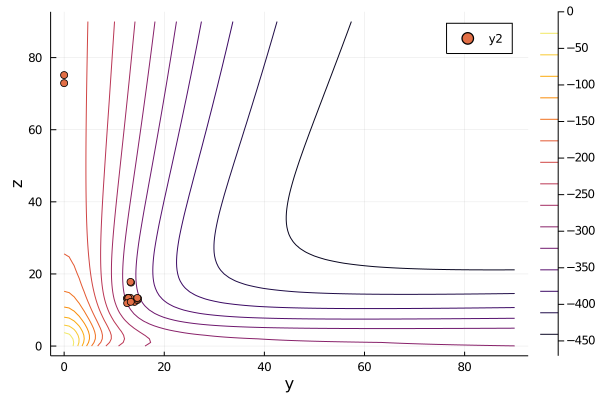

In [73]:
x=0:1:90 
y=0:1:90 
z=0:1:90

contour(y,z, (y,z)->totalobjectivefunction(0,y,z), xlabel=:y, ylabel=:z)
scatter!(yoptimal,zoptimal) # label=:minimizer)

# contour(x,y, (x,y)->totalobjectivefunction(x,y,0))
# scatter!(xoptimal,yoptimal)

# contour(x,z, (x,z)->totalobjectivefunction(x,0,z))
# scatter!(xoptimal,zoptimal)

### 4. Price of seed

Compute how much you would pay for each additional unit of seed in your solution.

### 5. One type of seed

Make three solutions in which you only use one type of seed. Analyse your solutions!